In [ ]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('/content/drive/MyDrive/model/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('/content/drive/MyDrive/model/model_final.h5')

model = loaded_model


print('Model successfully loaded')

Model successfully loaded


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/model/labels.csv")
data = np.array(data)
symbols = []
for i in range(len(data) - 1):
    if (data[i + 1][2]>data[i][2]):
        symbols.append(data[i][3])

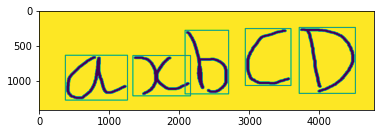

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#enter input image here
image = np.asarray(cv2.imread('/content/drive/MyDrive/model/test4.png', 0))
height, width = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
#gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

In [ ]:
import os
mypath = "/content/drive/MyDrive/model/test1.png"
try:
    #path=os.path.join(mypath, n)
    img=cv2.imread(mypath, cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img, (32, 32))

except Exception as e:
    print(str(e))

In [ ]:
sorted_ctrs

In [ ]:
for i,j in enumerate(sorted_ctrs):
  x, y, w, h = cv2.boundingRect(j)
  print(x)
  print(y)
  print(w) 
  print(h)

In [ ]:
r = image[526-10:526+1225+10, 595-10:595+397+10]

In [ ]:
r

In [ ]:
r.shape

In [ ]:
plt.imshow(r)

In [ ]:
r = cv2.resize(r, (32, 32), interpolation=cv2.INTER_CUBIC)

In [ ]:
plt.imshow(r)

In [ ]:
r.shape

In [ ]:
#r = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
r = np.array(r)
r.shape

In [ ]:
r = r/255

In [ ]:
r = 1 - r
r = r.reshape(-1,32,32,1)

In [ ]:
plt.imshow(r.reshape(32,32))
plt.show()

In [ ]:
#r = image[y-10:y+h+10, x-10:x+w+10]
#r = cv2.resize(r, (32, 32), interpolation=cv2.INTER_CUBIC)
#r = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
r = cv2.fastNlMeansDenoising(r, r, h = 5, templateWindowSize = 7, 	searchWindowSize = 21) 

In [ ]:
plt.imshow(r)

In [ ]:
r

In [ ]:
r = r/255

In [ ]:
r = 1 - r

In [ ]:
plt.imshow(r.reshape(32,32))

In [ ]:
r = np.array(r)
r.shape

In [ ]:
r = 1 - r

In [ ]:
r = r.reshape(-1,32,32,1)
pred = model.predict(r)
pred = pred.argmax()
print(pred)

In [ ]:
r = 1 - r

In [ ]:
pred = model.predict(r)

In [ ]:
pred = pred.argmax()

In [ ]:
print(pred)
print(symbols[pred])

In [ ]:
pch1 = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    print(roi)
    if (type(roi) == type(None)):
      pass
    else:
      roi = cv2.resize(roi, (32, 32), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(-1,32,32,1)
    m.append(roi)
    pred = model.predict(t)
    pred = pred.argmax()
    pch1.append(pred)
    #pchl.append(pred)

    

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


error: ignored

In [ ]:
print(pch1)
pcw = []
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pch1)):
    #print (pchl[i][0])
    pcw.append(symbols[pch1[i]])
    axs[i].set_title('-------> predicted letter: '+symbols[pch1[i]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)